## <h1><center> Data Analysis </center></h1>

Some basic items


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt

In [3]:
style.use('bmh')

In [44]:
# Load all avalible data

df_calandars = pd.read_csv('data/calendar_afcs2022.csv')
df_sales_train = pd.read_csv('data/sales_train_validation_afcs2022.csv')
df_sales_test = pd.read_csv('data/sales_test_validation_afcs2022.csv')
df_sample_sub = pd.read_csv('data/sample_submission_afcs2022.csv')
df_sell_prices = pd.read_csv('data/sell_prices_afcs2022.csv')

df_calandars

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
0,1/29/2011,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,1/30/2011,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,1/31/2011,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,2/1/2011,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1
4,2/2/2011,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1964,6/15/2016,11620,Wednesday,5,6,2016,NaN,NaN,NaN,NaN,1
1965,6/16/2016,11620,Thursday,6,6,2016,NaN,NaN,NaN,NaN,0
1966,6/17/2016,11620,Friday,7,6,2016,NaN,NaN,NaN,NaN,0
1967,6/18/2016,11621,Saturday,1,6,2016,NaN,NaN,NaN,NaN,0


## Analysing 'Calendar' Data

In [5]:
# Get all dates 

mondates = df_calandars[df_calandars['weekday'] == 'Monday']['date'].unique()
tuesdates = df_calandars[df_calandars['weekday'] == 'Tuesday']['date'].unique()
wednesdates = df_calandars[df_calandars['weekday'] == 'Wednesday']['date'].unique()
thursdates = df_calandars[df_calandars['weekday'] == 'Thursday']['date'].unique()
fridates = df_calandars[df_calandars['weekday'] == 'Friday']['date'].unique()
saturdates = df_calandars[df_calandars['weekday'] == 'Saturday']['date'].unique()
sundates = df_calandars[df_calandars['weekday'] == 'Sunday']['date'].unique()

string_dates = [mondates, tuesdates, wednesdates, thursdates, fridates, saturdates, sundates]


# Makes a string date into a datetime object
def get_datetime(string_date):
    l = string_date.split('/')
    return dt.datetime(int(l[2]), int(l[0]), int(l[1]))


# Gets the amount of days between the start date of the data and the given date
def get_dateindex(string_date):
    
    start_date = dt.datetime(2011, 1 ,29)
    end_date = get_datetime(string_date)
    
    return (end_date - start_date).days + 1

# Creates a 2d array of string indices to use as column names in the sales train_df
def get_string_indices(string_dates):
    string_indices = []

    for i, day in enumerate(string_dates):

        string_indices.append([])

        for s in day:
            num_index = get_dateindex(s)
            string_index = f'd_{num_index}'
            string_indices[i].append(string_index)

    return string_indices

# Gets the total amount of sales per weekday
def get_sales_by_day(string_dates):
    string_indices = get_string_indices(string_dates)
    
    tot_sales = []
    
    for i in range(len(string_indices)):
        tot_sales.append(df_sales_train[string_indices[i][:-8]].sum().sum())
        
    return tot_sales
    
string_indices = get_string_indices(string_dates)

<function matplotlib.pyplot.show(close=None, block=None)>

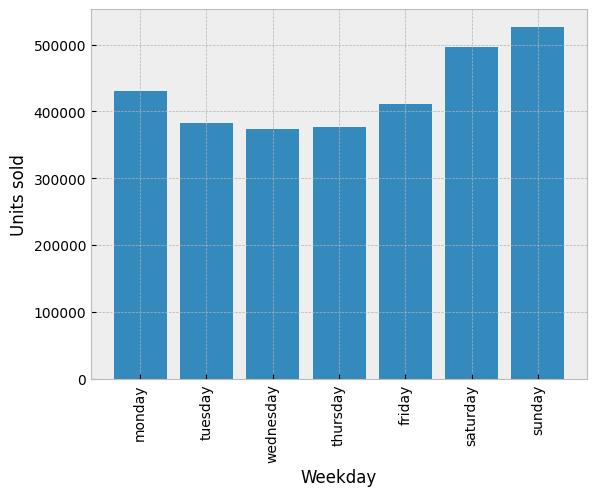

In [43]:

day_sales = get_sales_by_day(string_dates)
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# plt.bar(days, day_sales)

y_pos = range(len(days))
plt.bar(y_pos, day_sales)
plt.xticks(y_pos, days, rotation=90)
plt.xlabel('Weekday')
plt.ylabel('Units sold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

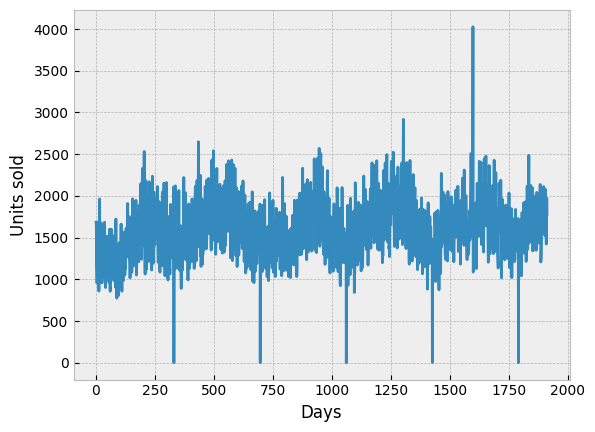

In [40]:
# Plotting the complete food sales per day

df_sales_train

food_sales = []
for column in df_sales_train.columns[1:]:
    food_sales.append(df_sales_train[column].sum())
    
x = np.linspace(1, len(food_sales), len(food_sales))
plt.plot(x, food_sales)
plt.xlabel('Days')
plt.ylabel('Units sold')
plt.show

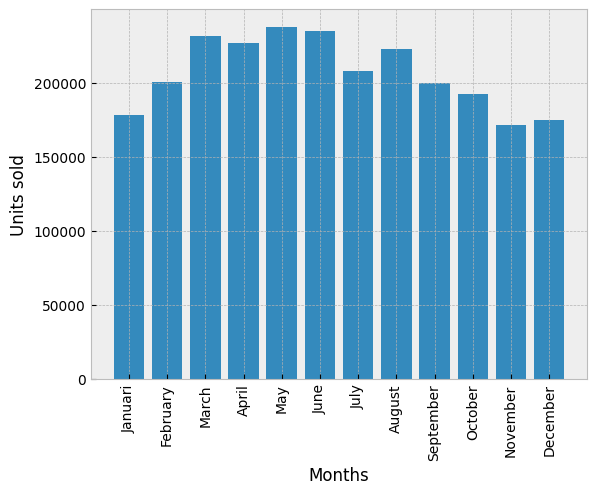

In [39]:
def get_months(string_dates):
    
    months = {
        1: [],
        2: [],
        3: [],
        4: [],
        5: [],
        6: [],
        7: [],
        8: [],
        9: [],
        10: [],
        11: [],
        12: []
    }
    
    for s in string_dates:
        datetime = get_datetime(s)
        num_index = get_dateindex(s)
        string_index = f'd_{num_index}'
        months[datetime.month].append(string_index)
        
    return months
        
all_dates = df_calandars['date'].unique()
indices_per_month = get_months(all_dates)

months = ['Januari', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

foo = []
for m in indices_per_month:
    foo.append(df_sales_train[indices_per_month[m][:-31]].sum().sum())

y_pos = range(len(months))
plt.bar(y_pos, foo)
plt.xticks(y_pos, months, rotation=90)
plt.xlabel('Months')
plt.ylabel('Units sold')
# plt.title('Units sold per month')
plt.show()

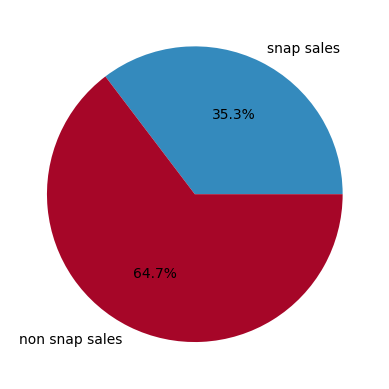

In [66]:
snap_dates = df_calandars[df_calandars['snap_TX'] == 1]['date'].unique()
no_snap_dates = df_calandars[df_calandars['snap_TX'] == 0]['date'].unique()

string_indices = get_string_indices([snap_dates, no_snap_dates])

snap_sales = df_sales_train[string_indices[0][:-30]].sum().sum()
no_snap_sales = df_sales_train[string_indices[1][:-36]].sum().sum() 

plt.pie([snap_sales, no_snap_sales], labels=['snap sales', "non snap sales"], autopct='%1.1f%%')

plt.show()

## Analysing 'Sales Train'

In [82]:
df_sales_train.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0


In [83]:

df_sales_train["id"].unique()

array(['FOODS_3_001_TX_3_validation', 'FOODS_3_002_TX_3_validation',
       'FOODS_3_003_TX_3_validation', 'FOODS_3_004_TX_3_validation',
       'FOODS_3_005_TX_3_validation', 'FOODS_3_006_TX_3_validation',
       'FOODS_3_007_TX_3_validation', 'FOODS_3_008_TX_3_validation',
       'FOODS_3_009_TX_3_validation', 'FOODS_3_010_TX_3_validation',
       'FOODS_3_011_TX_3_validation', 'FOODS_3_012_TX_3_validation',
       'FOODS_3_013_TX_3_validation', 'FOODS_3_014_TX_3_validation',
       'FOODS_3_015_TX_3_validation', 'FOODS_3_016_TX_3_validation',
       'FOODS_3_017_TX_3_validation', 'FOODS_3_018_TX_3_validation',
       'FOODS_3_019_TX_3_validation', 'FOODS_3_020_TX_3_validation',
       'FOODS_3_021_TX_3_validation', 'FOODS_3_022_TX_3_validation',
       'FOODS_3_023_TX_3_validation', 'FOODS_3_024_TX_3_validation',
       'FOODS_3_025_TX_3_validation', 'FOODS_3_026_TX_3_validation',
       'FOODS_3_027_TX_3_validation', 'FOODS_3_028_TX_3_validation',
       'FOODS_3_029_TX_3_validatio

Looking at a random 'id' from the sales train

In [84]:
product = df_sales_train[df_sales_train["id"]=="FOODS_3_541_TX_3_validation"]
product = product.set_index("id")
product.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,,,,,,,,,,,,,,,,,,,,,
FOODS_3_541_TX_3_validation,5,4,5,6,0,5,5,9,7,8,...,0,0,0,0,0,0,0,0,0,0


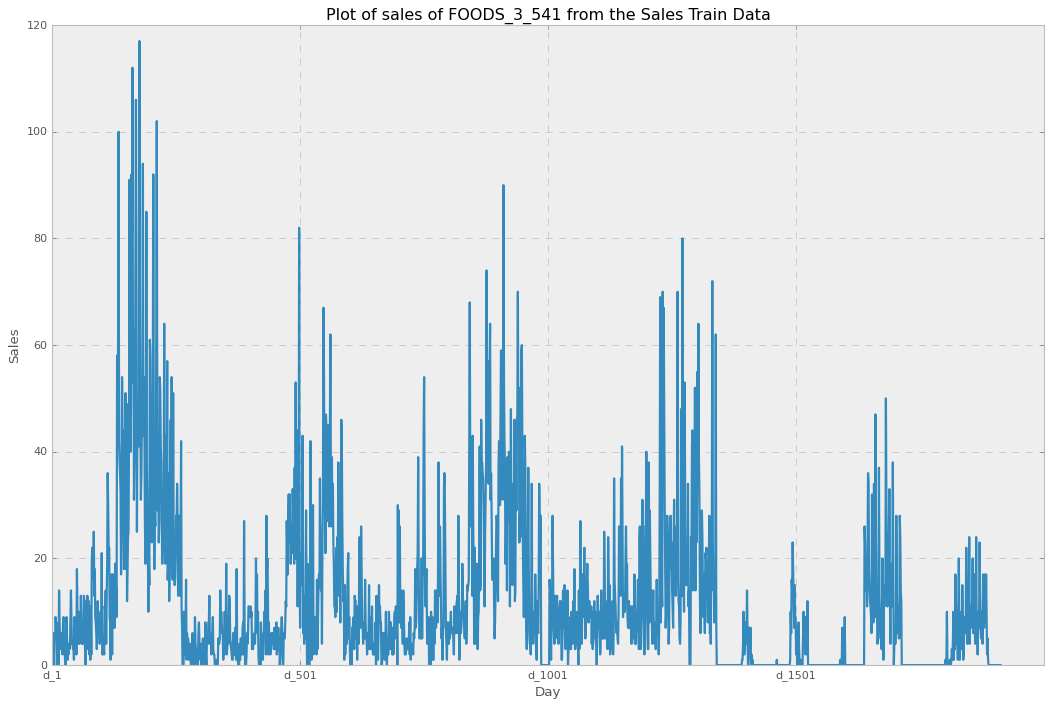

In [91]:
row = product.iloc[0]
row.plot(figsize=[16,10])
ax = plt.gca()
plt.title("Plot of sales of FOODS_3_541 from the Sales Train Data")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.show()